# Statistical Insights and Hypothesis Testing: A Study on Northwind Database
### Applying Hypothesis Tests to the Northwind Sample Database for Data-Driven Insights

### Introduction

Welcome to this analytical project where we delve into the Northwind database to extract actionable business insights. The Northwind database serves as a comprehensive dataset that encapsulates various facets of a business, from customer details to product sales.

### Project Goal

The overarching goal is to employ statistical hypothesis testing to validate or invalidate assumptions about business operations. The insights derived could be pivotal in shaping effective business strategies.

### What is Hypothesis Testing?

Hypothesis testing is a statistical method used to make inferences or educated guesses about a population based on a sample of data. In the context of business, it can be used to validate assumptions made about sales, customer behavior, and other operational metrics.

- **Null Hypothesis (H0):** This is the initial assumption that there is no effect or relationship between variables. It serves as the starting point that we aim to test against.

- **Alternative Hypothesis (Ha):** This is what you want to prove. It is the opposite of the null hypothesis and indicates the presence of an effect or relationship.

**Example:** If we assume that the average spending of customers from two different regions is the same, that's our null hypothesis (H0). The alternative hypothesis (Ha) would be that the average spending is different between these two regions.

### Types of Statistical Tests

We will employ a variety of statistical tests to answer different types of questions:

- **T-Tests:** Used for comparing the means between two groups.

- **Chi-Square Tests:** Ideal for examining the relationship between categorical variables.

- **ANOVA:** Useful for comparing means across three or more groups.

- **Z-Tests:** Employed when the sample size is large, to compare sample and population means.

- **F-Tests:** Used to compare the variances of two different samples.

- **Regression Analysis:** Applied for predicting outcomes based on relationships between variables.

### Importance of Statistical Testing

Statistical tests are crucial for several reasons:

- **Validation:** They help validate or invalidate business assumptions, lending credibility to strategies.

- **Insight Generation:** They can uncover hidden trends and relationships in the data.

- **Risk Mitigation:** They provide a data-backed approach to decision-making, reducing business risks.

- **Strategic Planning:** Empirical data supports the formulation of more effective and targeted business strategies.

Let's dive into the data and start our journey of discovery!


## Hypothesis Testing Scenarios

### Discounts and Order Quantity

**Problem Statement:** Do discounts have a statistically significant effect on the number of products customers order? If so, at what level(s) of discount?

**Test:** ANOVA (to compare means across multiple discount levels)

### Employee Sales Performance

**Problem Statement:** Is there a significant difference in the number of sales made by employees based on their tenure or region?

**Test:** T-Test or ANOVA (depending on the number of groups being compared)

### Order Frequency by Region

**Problem Statement:** Is there a significant association between a customer's region and the frequency of their orders?

**Test:** Chi-Square Test of Independence

### Product Popularity by Category

**Problem Statement:** Are certain product categories ordered more frequently than others?

**Test:** ANOVA or Chi-Square Test (depending on the nature of the data)

### Supplier Impact on Order Quantity

**Problem Statement:** Do certain suppliers contribute to a significantly higher order quantity than others?

**Test:** ANOVA

### Shipping Time Impact on Customer Satisfaction

**Problem Statement:** Does a longer shipping time lead to lower customer satisfaction ratings?

**Test:** Regression Analysis

### Price Elasticity of Products

**Problem Statement:** How does the price of a product influence its sales volume? Is there a significant relationship?

**Test:** Regression Analysis

### Seasonal Effects on Sales

**Problem Statement:** Are there certain months or seasons where sales are significantly higher?

**Test:** Time Series Analysis or T-Test

### Customer Lifetime Value by Region

**Problem Statement:** Is the average lifetime value of a customer significantly different across regions?

**Test:** ANOVA

### Effect of Discount Depth on Sales Volume

**Problem Statement:** Does offering deeper discounts (e.g., 20% vs. 10%) result in a significantly higher sales volume?

**Test:** Z-Test (especially if comparing to a larger population or benchmark)


<sub><sup>
**Confidence Intervals:**

*Concept:* Estimate the range in which a population parameter lies with a certain level of confidence.

*Application:* Calculate the confidence interval for the average order quantity or average order value.

**Binomial Distribution and Tests:**

*Concept:* Understand the distribution of successes in a fixed number of independent Bernoulli trials.

*Application:* Analyze the success rate of a specific product being ordered when presented in a promotional offer.

**Bayesian Inference:**

*Concept:* Update the probability estimate for a hypothesis as more evidence becomes available.

*Application:* Update the probability of a product being reordered based on new monthly sales data.

**Power Analysis:**

*Concept:* Determine the sample size required to detect an effect of a given size with a given degree of confidence.

*Application:* Determine how many orders you need to sample to detect a 5% increase in sales due to a new marketing strategy.

**Chebyshev's Inequality:**

*Concept:* Provides a lower bound on the probability that a random variable lies within a certain number of standard deviations away from its mean.

*Application:* Analyze the variability of product prices or order quantities.

**Central Limit Theorem:**

*Concept:* For sufficiently large sample sizes, the distribution of the sample mean will be approximately normally distributed, regardless of the distribution of the population.

*Application:* Demonstrate this concept by sampling different sizes from order quantities and plotting the resulting distributions.

**Poisson Distribution:**

*Concept:* Represents the number of events occurring in a fixed interval of time or space.

*Application:* Model the number of orders received in fixed intervals of time (e.g., daily).

**Non-parametric Tests:**

*Concept:* Statistical tests that do not assume a specific distribution for the data.

*Application:* Use the Mann-Whitney U test or Kruskal-Wallis test to compare order quantities across different categories when data doesn't meet normality assumptions.

**Effect Size:**

*Concept:* Quantify the size of the difference between two groups, independent of sample size.

*Application:* After conducting a t-test or ANOVA, calculate the effect size (like Cohen's d) to understand the practical significance of the results.

**Survival Analysis:**

*Concept:* Analyze the expected duration of time until one or more events happen.

*Application:* Analyze the duration between a customer's first order and a subsequent reorder.
</sub></sup>


In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib.patches import Rectangle

import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import pingouin as pg


#plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [2]:
os.listdir('D:\Statistical_analysis\Statistical-Analysis-on-Northwind-Sample-Database\Data')

['categories.csv',
 'customers.csv',
 'employees.csv',
 'employee_territories.csv',
 'orders.csv',
 'orders_details.csv',
 'products.csv',
 'regions.csv',
 'shippers.csv',
 'suppliers.csv',
 'territories.csv']

In [3]:
# load data
# Define the list of table names (CSV filenames)
table_names = [
    'categories',
    'customers',
    'employees',
    'employee_territories',
    'orders',
    'orders_details',
    'products',
    #'regions',
    'shippers',
    'suppliers',
    #'territories'
]

# Specify the base directory where your "Data" folder is located
base_directory = r'D:\Statistical_analysis\Statistical-Analysis-on-Northwind-Sample-Database\Data'

# Loop through the table names and read each CSV file into a DataFrame
for table in table_names:
    # Construct the full path to the CSV file using os.path.join
    csv_file_path = os.path.join(base_directory, f'{table}.csv')
    
    # Read the CSV file into a DataFrame and assign it to a variable with the same name as the table
    exec(f"{table} = pd.read_csv('{csv_file_path}')")

In [4]:
# load remaining data
regions = pd.read_csv(r'D:\Statistical_analysis\Statistical-Analysis-on-Northwind-Sample-Database\Data\regions.csv')
territories = pd.read_csv(r"D:\Statistical_analysis\Statistical-Analysis-on-Northwind-Sample-Database\Data\territories.csv")

In [5]:
# check dataframes loaded properly or not
tables= [categories,
 customers,
 employees,
 employee_territories,
 orders,
 orders_details,
 products,
 regions,
 shippers,
 suppliers,
 territories]


for table in tables:
        print(table.head(3))

   categoryid categoryname                                        description  \
0           1    Beverages        Soft drinks, coffees, teas, beers, and ales   
1           2   Condiments  Sweet and savory sauces, relishes, spreads, an...   
2           3  Confections                Desserts, candies, and sweet breads   

  picture  
0      \x  
1      \x  
2      \x  
  customerid                         companyname     contactname  \
0      ALFKI                 Alfreds Futterkiste    Maria Anders   
1      ANATR  Ana Trujillo Emparedados y helados    Ana Trujillo   
2      ANTON             Antonio Moreno Taquería  Antonio Moreno   

           contacttitle                        address         city region  \
0  Sales Representative                  Obere Str. 57       Berlin    NaN   
1                 Owner  Avda. de la Constitución 2222  México D.F.    NaN   
2                 Owner                Mataderos  2312  México D.F.    NaN   

  postalcode  country         phone      

Data Model


![Image Alt Text](https://drive.google.com/uc?export=download&id=1tTeLCT-niYwD-q8pQzw9RdrWZ4Me2A6_)


## 1.Investigating the Impact of Discounts on Product Orders

## Does offering discounts significantly influence the quantity of products ordered by customers? If so, which discount levels are most effective?

## Experimental Design: Analyzing the Impact of Sales Discounts on Order Quantity

### Background
Sales discounts are a strategic tool employed by businesses to boost revenue. By attracting more customers and incentivizing larger purchases, discounts can significantly enhance sales volume. However, the key lies in determining the optimal discount level that maximizes revenue without compromising profit margins.

### Objective
The primary aim of this analysis is to ascertain whether discounts influence the quantity of products ordered by customers. Furthermore, we seek to identify which specific discount levels yield the most significant impact on order quantities.

### Data Source
For this analysis, we will utilize the order_details table, which provides comprehensive data on orders, products, and associated discounts.

![Hypothesis Testing Steps](https://drive.google.com/uc?export=download&id=1BDpyYCRkhx2YmflQVohTdASz4ahMeo2R)

*Image Source: [Hypothesis Testing Steps](https://medium.com/analytics-vidhya/hypothesis-testing-steps-235d2670cad4)*

### Hypotheses
- **Null Hypothesis (H0):** Discounts do not have a statistically significant effect on the quantity of products ordered by customers.
  
- **Alternative Hypothesis (Ha):** Discounts have a statistically significant effect on the quantity of products ordered by customers.


#### EDA 

In [6]:
orders_details.head()

,orderid,productid,unitprice,quantity,discount
0,10248,11,14.0,12,0.0
1,10248,42,9.8,10,0.0
2,10248,72,34.8,5,0.0
3,10249,14,18.6,9,0.0
4,10249,51,42.4,40,0.0


In [7]:
orders_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   orderid    2155 non-null   int64  
 1   productid  2155 non-null   int64  
 2   unitprice  2155 non-null   float64
 3   quantity   2155 non-null   int64  
 4   discount   2155 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 84.3 KB


No Missing values, data is clean

In [8]:
# descriptive analysis of the data
orders_details.describe() 

,orderid,productid,unitprice,quantity,discount
count,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000
mean,10659.375870,40.793039,26.218520,23.812993,0.056167
std,241.378032,22.159019,29.827418,19.022047,0.083450
min,10248.000000,1.000000,2.000000,1.000000,0.000000
25%,10451.000000,22.000000,12.000000,10.000000,0.000000
50%,10657.000000,41.000000,18.400000,20.000000,0.000000
75%,10862.500000,60.000000,32.000000,30.000000,0.100000
max,11077.000000,77.000000,263.500000,130.000000,0.250000


* The quantity column, which we are primarily interested in, has values ranging from 1 to 130 with a mean of approximately 23.81.
* The discount column values range from 0 (no discount) to 0.25 (25% discount) with an average discount of approximately 5.62%.

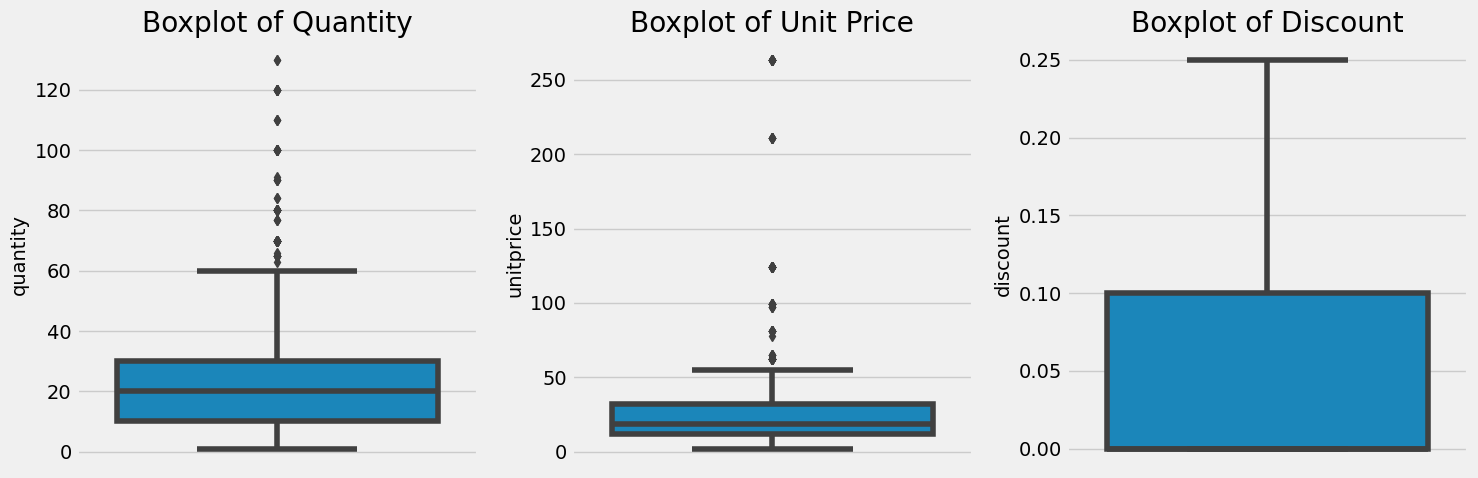

In [9]:
# Plotting box plots to visualize outliers
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(y=orders_details['quantity'], ax=ax[0])
ax[0].set_title('Boxplot of Quantity')

sns.boxplot(y=orders_details['unitprice'], ax=ax[1])
ax[1].set_title('Boxplot of Unit Price')

sns.boxplot(y=orders_details['discount'], ax=ax[2])
ax[2].set_title('Boxplot of Discount')

plt.tight_layout()
plt.show()


Outliers:

Quantity: There are some higher order quantities that are considered outliers, but these might be bulk orders or specific promotions.

Unit Price: There are several outliers on the higher end. This suggests some products are priced significantly higher than others.

Discount: The data seems fairly consistent, with no significant outliers. However, there are some discounts around 1-6% that appear less frequent than others.

Given the nature of the data (sales/orders), it's plausible to have outliers, especially for bulk orders or premium products. We'll keep these in mind as we proceed, but we won't remove them just yet. Business context and further analysis will guide us on how to handle them.